# Data Cleaning

In [387]:
# Import libraries
%matplotlib inline
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pyod.models.abod import ABOD
from pyod.models.knn import KNN
from pyod.models.iforest import IForest
from pyod.utils.data import get_outliers_inliers
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]

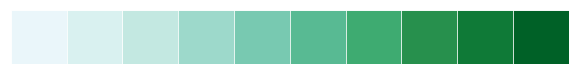

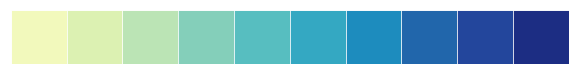

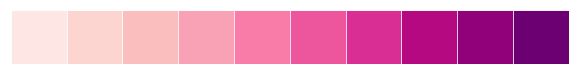

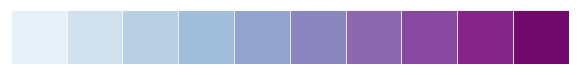

In [388]:
# Create color palettes for seaborn
sns.palplot(sns.color_palette("BuGn", 10))
sns.palplot(sns.color_palette("YlGnBu", 10))
RdPu = ['#fff7f3','#fde0dd','#fcc5c0','#fa9fb5','#f768a1','#dd3497','#ae017e','#7a0177','#49006a']
sns.palplot(sns.color_palette("RdPu", 10))
BuPu = ['#f7fcfd','#e0ecf4','#bfd3e6','#9ebcda','#8c96c6','#8c6bb1','#88419d','#810f7c','#4d004b']
sns.palplot(sns.color_palette("BuPu", 10))

In [389]:
# Read Excel file into dataframe
df = pd.read_excel('credit_card_default.xls')

In [390]:
# Rename columns
df.columns = df.iloc[0]

In [391]:
# Sanity check
df.head()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [392]:
# Reset index, eliminate redundant row
df = df.drop(["ID"]).reset_index(drop = True)

In [393]:
# Check progress
df.head()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [394]:
# Check data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null object
SEX                           30000 non-null object
EDUCATION                     30000 non-null object
MARRIAGE                      30000 non-null object
AGE                           30000 non-null object
PAY_0                         30000 non-null object
PAY_2                         30000 non-null object
PAY_3                         30000 non-null object
PAY_4                         30000 non-null object
PAY_5                         30000 non-null object
PAY_6                         30000 non-null object
BILL_AMT1                     30000 non-null object
BILL_AMT2                     30000 non-null object
BILL_AMT3                     30000 non-null object
BILL_AMT4                     30000 non-null object
BILL_AMT5                     30000 non-null object
BILL_AMT6                     30000 non-null object
PAY_AMT

In [395]:
# Change column types to integers
df = df.astype("int64")

In [396]:
# Change SEX column to Male/Female
df["SEX"] = np.where(df.SEX == 1, "Male", "Female")
df.SEX.value_counts()

Female    18112
Male      11888
Name: SEX, dtype: int64

In [397]:
# Check data for outliers and other irregularities
df.describe()

ID,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [398]:
# Drop rows with non-sensical values from EDUCATION column
ed_todrop = df[(df.EDUCATION>4) | (df.EDUCATION==0)].index
df.drop(ed_todrop, inplace=True)
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      123
Name: EDUCATION, dtype: int64

In [399]:
# Drop rows with non-sensical values from MARRIAGE column
mar_todrop = df[(df.MARRIAGE>4) | (df.MARRIAGE==0)].index
df.drop(mar_todrop, inplace=True)
df.MARRIAGE.value_counts()

2    15806
1    13477
3      318
Name: MARRIAGE, dtype: int64

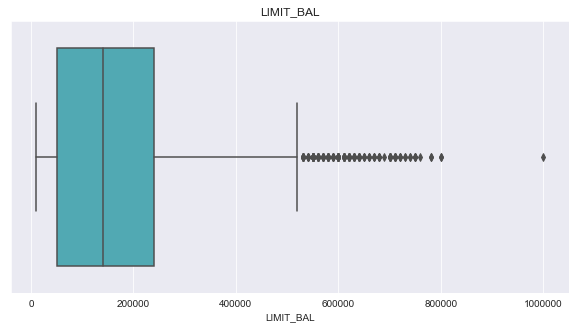

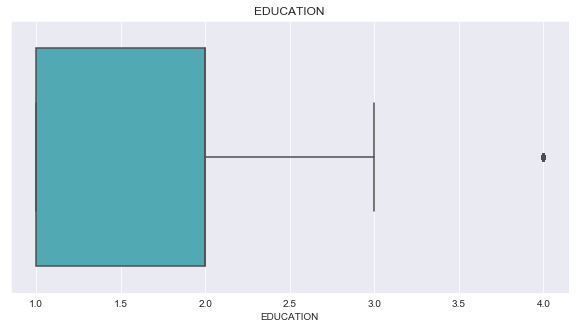

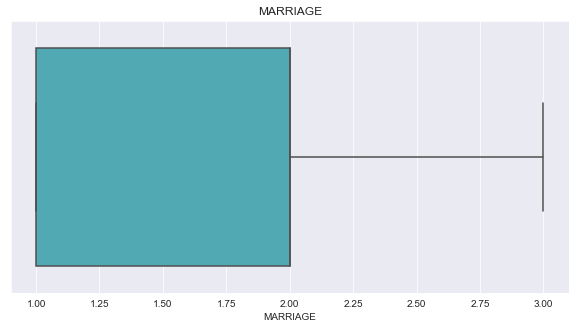

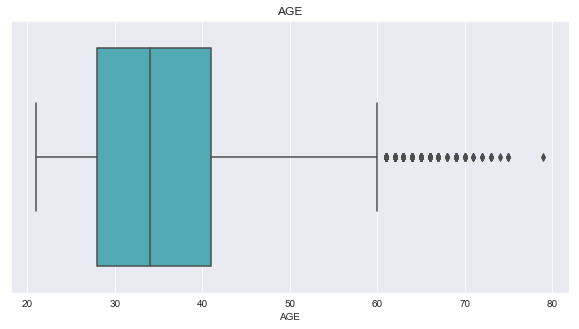

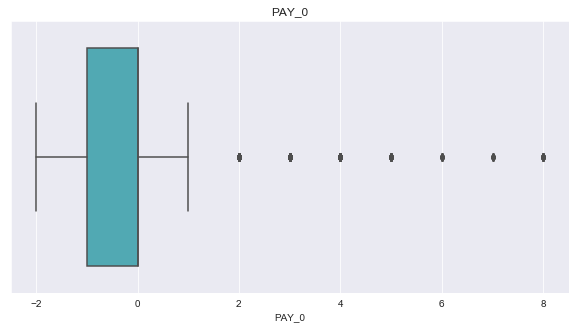

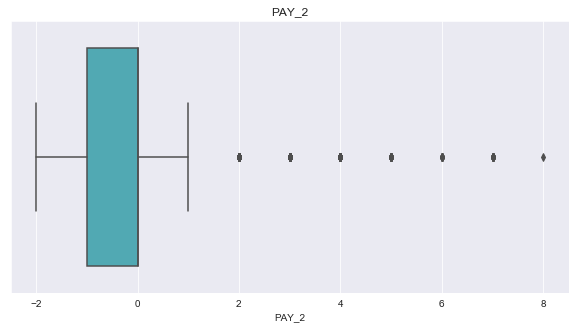

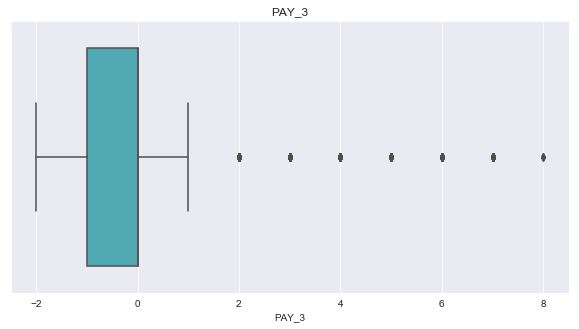

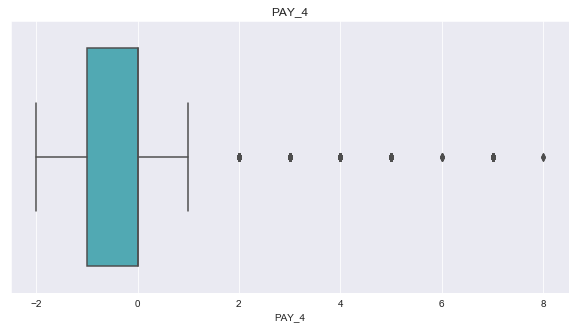

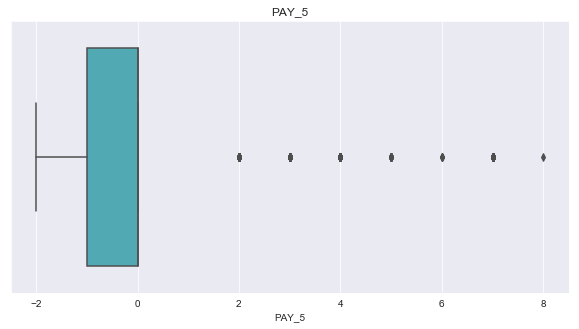

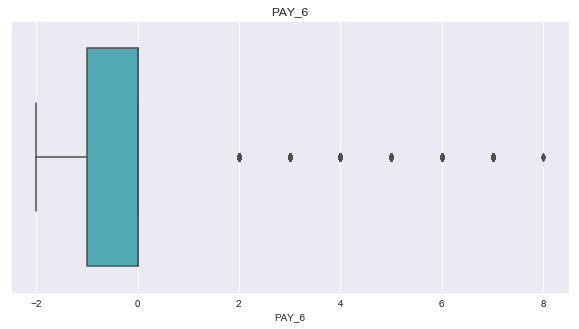

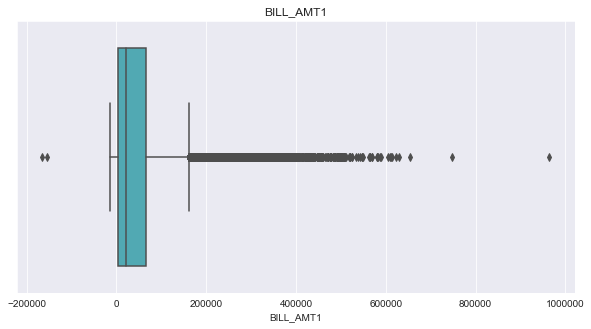

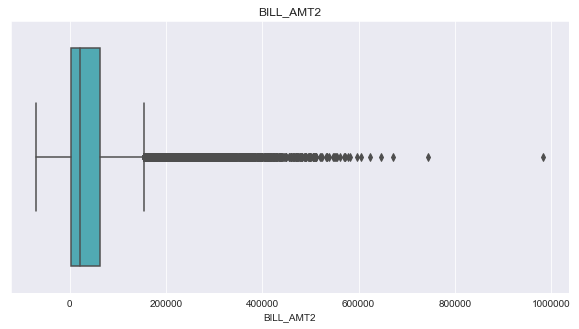

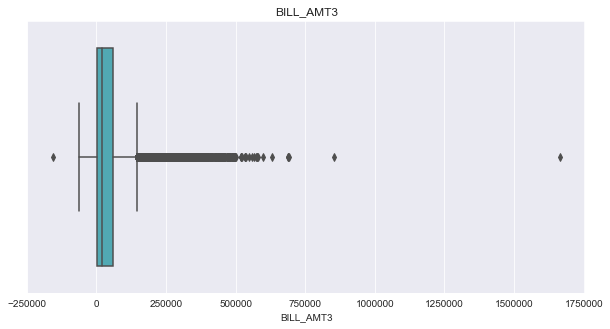

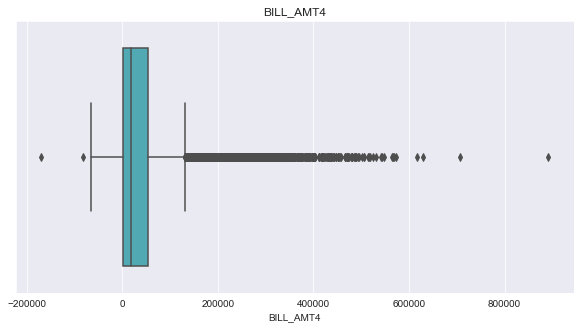

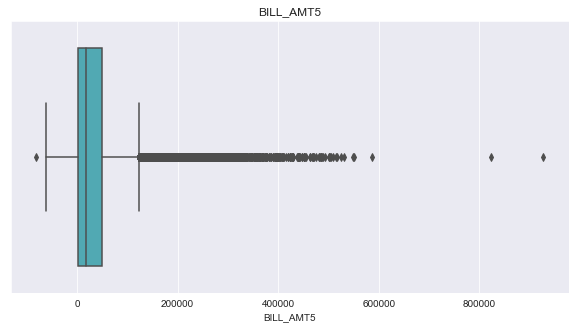

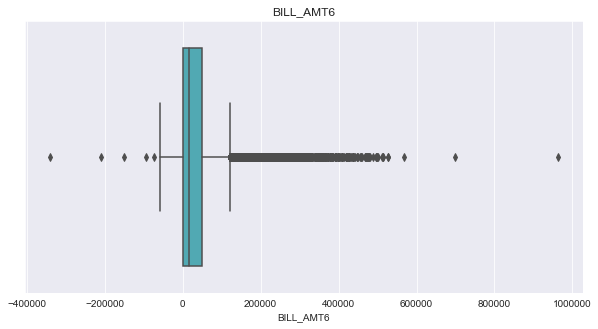

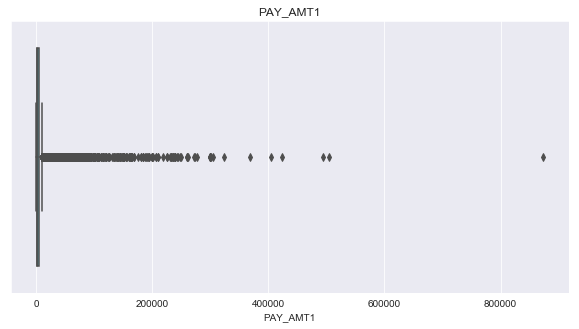

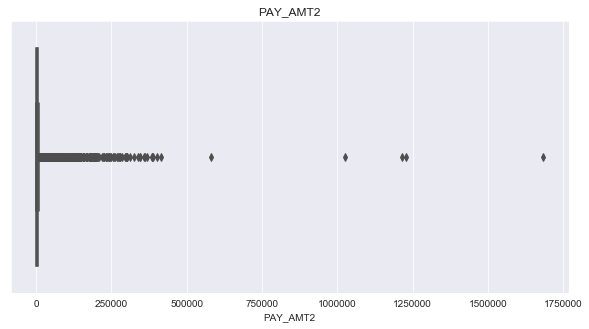

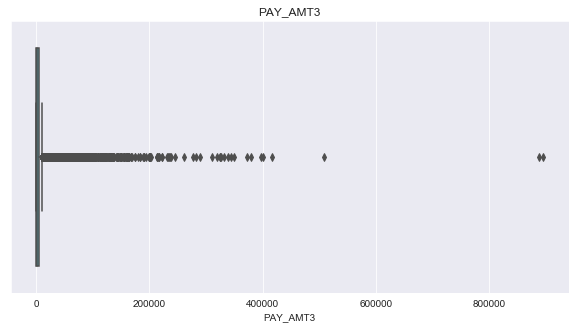

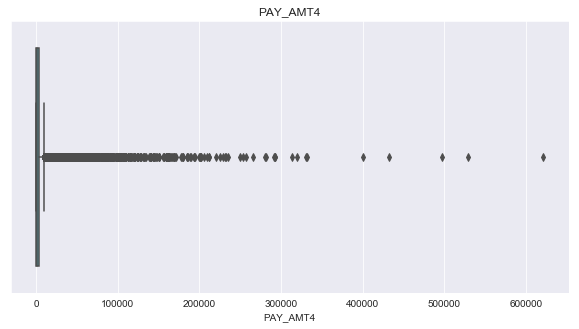

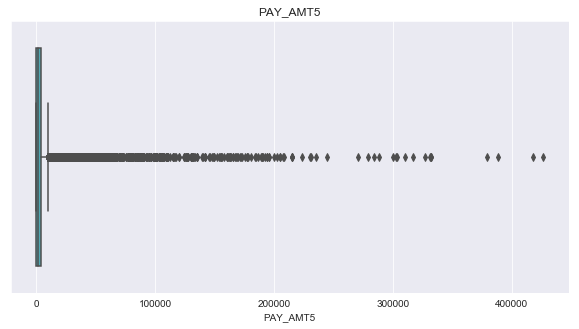

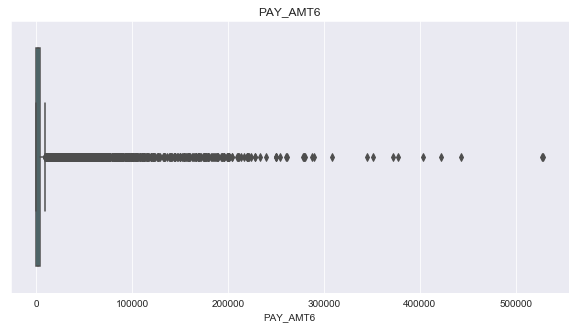

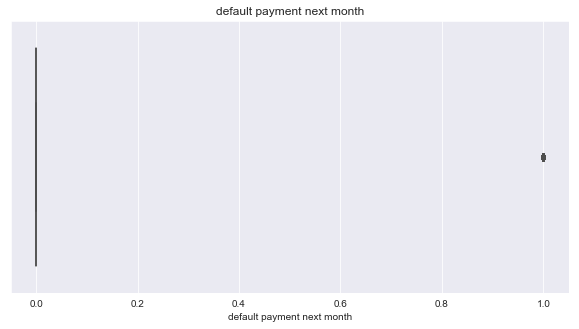

In [400]:
# Create boxplot for all numerical values to check distributions
for column in df.columns:
    if column != "SEX":
        sns.boxplot(x = column, palette = "YlGnBu", data = df).set_title(column)
        plt.show()

In [401]:
df.drop(["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"], axis = 1, inplace = True)

In [402]:
df.head()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,Female,2,1,24,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,Female,2,2,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,Female,2,2,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,Female,2,1,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,Male,2,1,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [403]:
# Replace spaces with undersocre in column names
df.columns = df.columns.str.replace(' ', '_')

In [404]:
# Sanity Check
df.head()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,20000,Female,2,1,24,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,Female,2,2,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,Female,2,2,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,Female,2,1,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,Male,2,1,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Exploratory Data Analysis

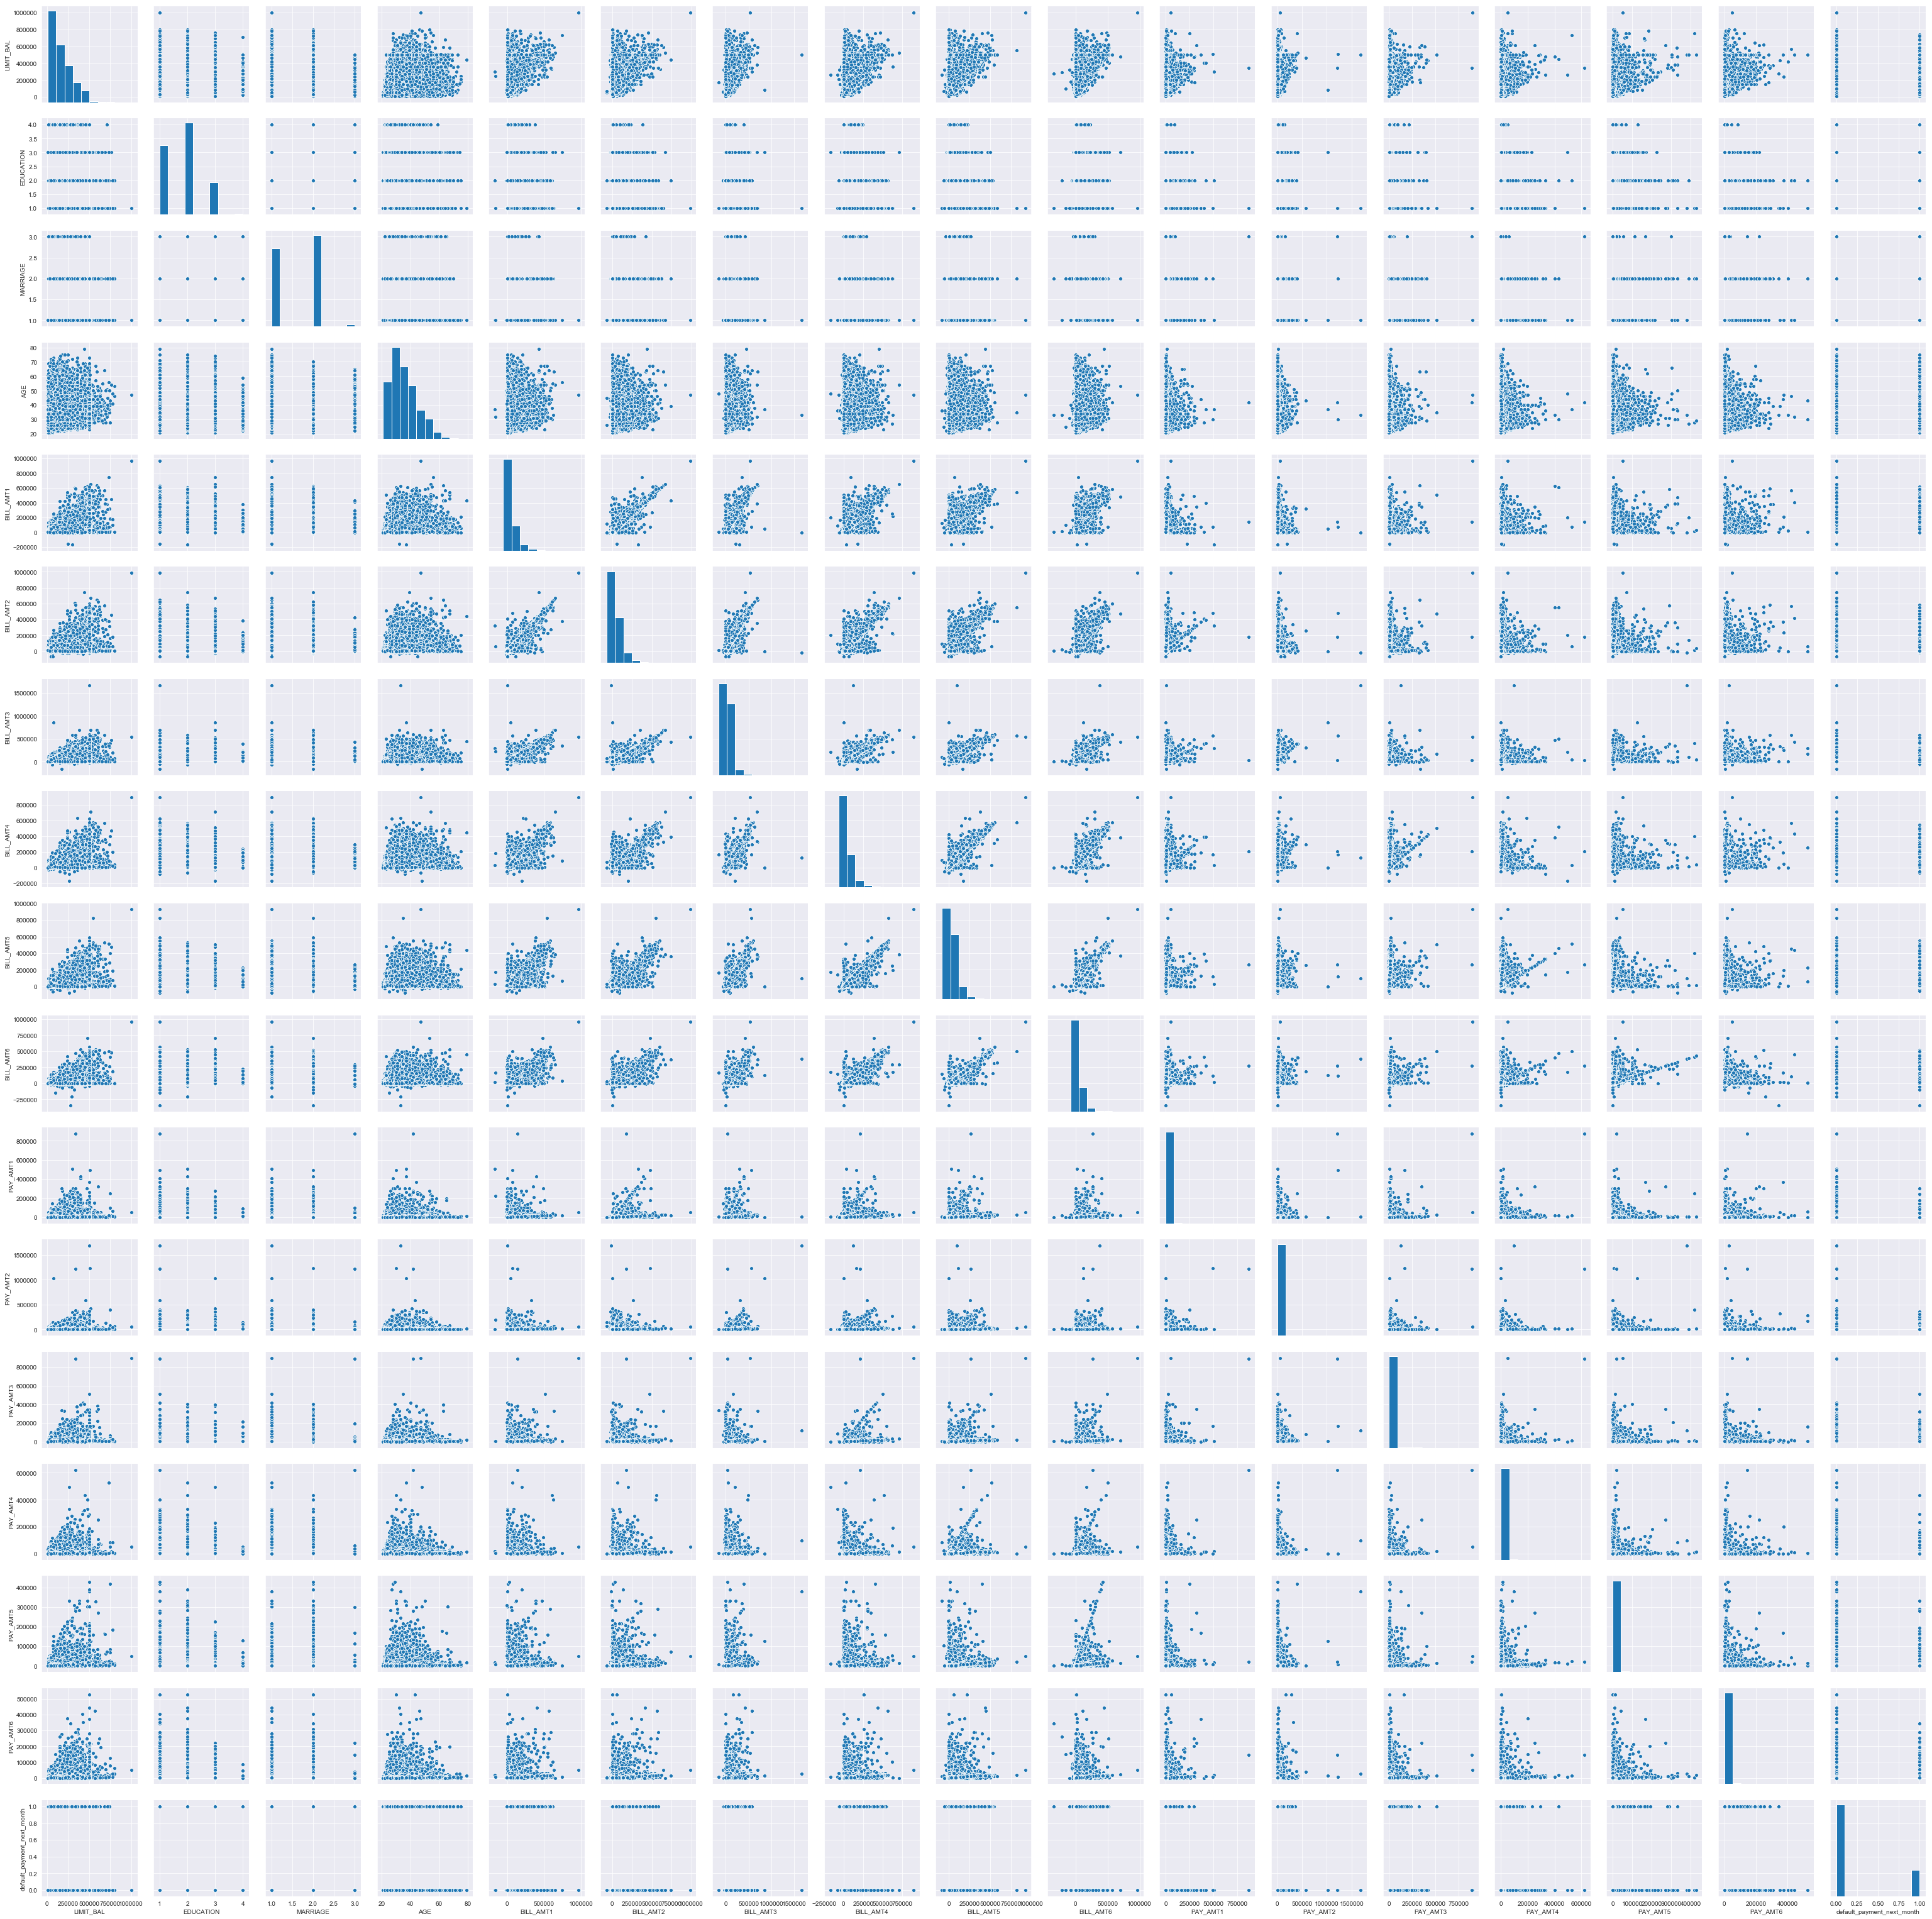

In [321]:
# Explore relationships between variables using a pairplot
sns.pairplot(df, palette = "RdPU")
plt.show()

In [322]:
# Correlation Matrix
df.corr()

ID,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
ID,,,,,,,,,,,,,,,,,
LIMIT_BAL,1.000000,-0.244039,-0.109756,0.144214,0.283695,0.276673,0.281738,0.293442,0.295316,0.289701,0.195666,0.177669,0.210523,0.203263,0.217251,0.219676,-0.154357
EDUCATION,-0.244039,1.000000,-0.147977,0.187425,0.005120,0.001250,-0.003499,-0.014428,-0.018165,-0.015190,-0.045972,-0.038628,-0.051966,-0.043094,-0.049469,-0.053670,0.049087
MARRIAGE,-0.109756,-0.147977,1.000000,-0.418284,-0.024971,-0.022505,-0.026171,-0.023902,-0.026148,-0.022198,-0.005120,-0.008058,-0.002921,-0.013957,-0.002882,-0.006024,-0.026903
AGE,0.144214,0.187425,-0.418284,1.000000,0.054704,0.052385,0.051839,0.049839,0.048323,0.046712,0.025440,0.022402,0.029478,0.021567,0.021511,0.019139,0.014424
BILL_AMT1,0.283695,0.005120,-0.024971,0.054704,1.000000,0.951255,0.891886,0.861238,0.831406,0.804834,0.140489,0.098947,0.156813,0.157643,0.165041,0.175798,-0.019303
BILL_AMT2,0.276673,0.001250,-0.022505,0.052385,0.951255,1.000000,0.927801,0.893418,0.861465,0.833846,0.280903,0.100613,0.151052,0.146479,0.155457,0.170718,-0.013710
BILL_AMT3,0.281738,-0.003499,-0.026171,0.051839,0.891886,0.927801,1.000000,0.925094,0.885669,0.855571,0.244564,0.318039,0.131112,0.142468,0.177549,0.179539,-0.013494
BILL_AMT4,0.293442,-0.014428,-0.023902,0.049839,0.861238,0.893418,0.925094,1.000000,0.940458,0.902348,0.233241,0.208175,0.300270,0.129010,0.160036,0.175067,-0.009474
BILL_AMT5,0.295316,-0.018165,-0.026148,0.048323,0.831406,0.861465,0.885669,0.940458,1.000000,0.947211,0.218717,0.181988,0.252535,0.293204,0.140896,0.162081,-0.006226


In [323]:
# Meaningful correlations, exploring collinearity
abs(df.corr()) > 0.60

ID,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
ID,,,,,,,,,,,,,,,,,
LIMIT_BAL,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
EDUCATION,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
MARRIAGE,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
AGE,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
BILL_AMT1,False,False,False,False,True,True,True,True,True,True,False,False,False,False,False,False,False
BILL_AMT2,False,False,False,False,True,True,True,True,True,True,False,False,False,False,False,False,False
BILL_AMT3,False,False,False,False,True,True,True,True,True,True,False,False,False,False,False,False,False
BILL_AMT4,False,False,False,False,True,True,True,True,True,True,False,False,False,False,False,False,False
BILL_AMT5,False,False,False,False,True,True,True,True,True,True,False,False,False,False,False,False,False


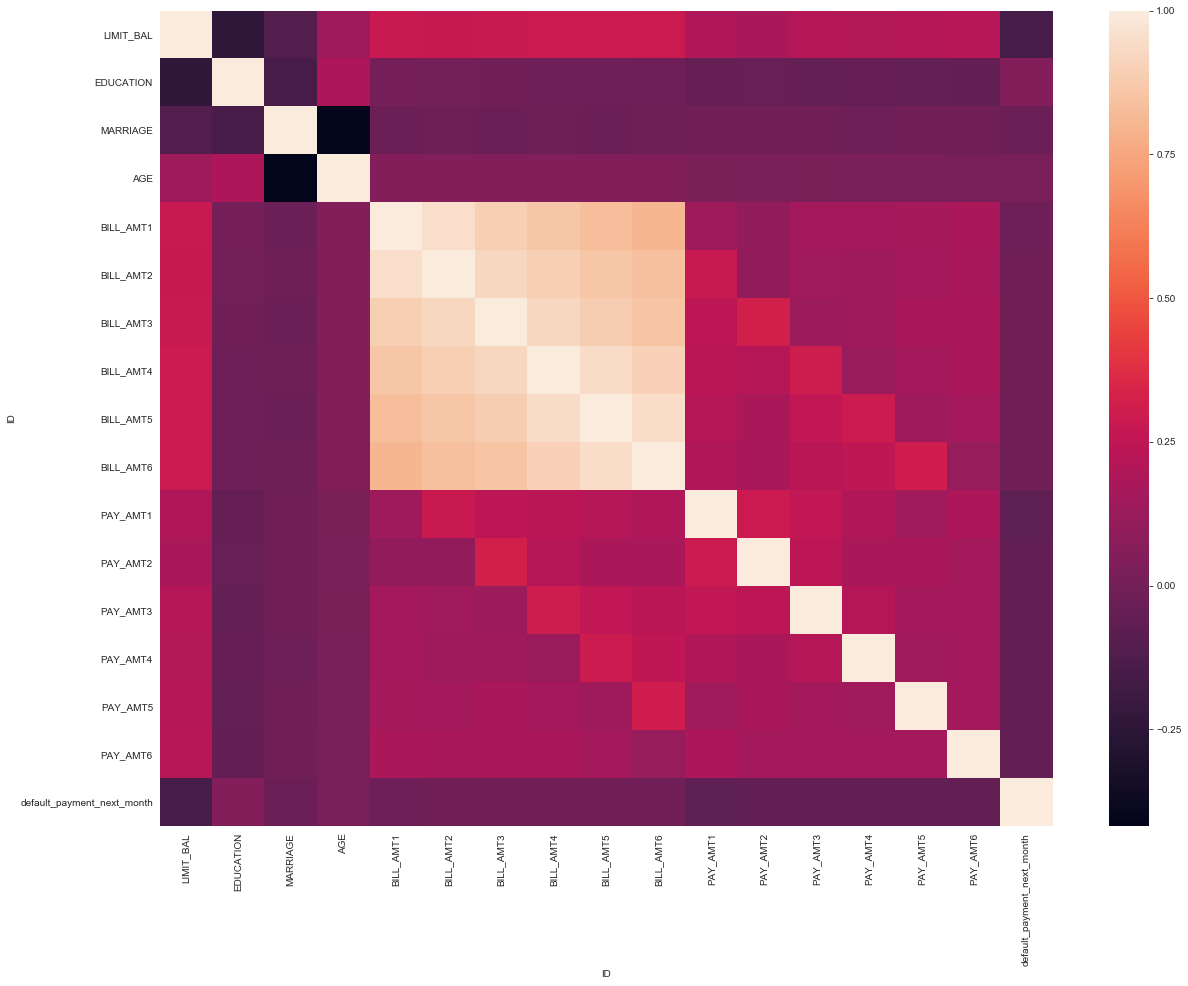

In [324]:
# Heatmap
plt.figure(figsize = (20, 15))
sns.heatmap(df.corr())
plt.show()

Target Variable
default_payment_next_month
0    22996
1     6605
Name: default_payment_next_month, dtype: int64


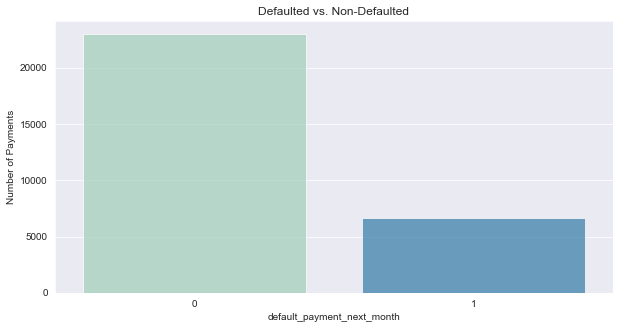

In [405]:
# Default Count. Where 0 = No and 1 = Yes
print('Target Variable')
print(df.groupby(["default_payment_next_month"]).default_payment_next_month.count())

# Target Variable Countplot
sns.set_style("darkgrid")
plt.figure(figsize = (10, 5))
sns.countplot(df["default_payment_next_month"], alpha = .70, palette = "YlGnBu")
plt.title("Defaulted vs. Non-Defaulted")
plt.ylabel("Number of Payments")
plt.show()

Defaults by gender


default_payment_next_month      0     1
SEX                                    
Female                      14111  3744
Male                         8885  2861


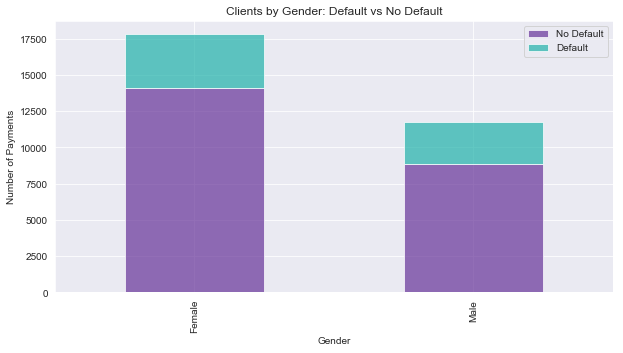

In [406]:
# Defaults by gender
print("Defaults by gender")

print('\n')
print(df.groupby(["SEX","default_payment_next_month"]).SEX.count().unstack())

# Client gender visualization
gender = df.groupby(["SEX","default_payment_next_month"]).SEX.count().unstack()
p1 = gender.plot(kind = "bar", stacked = True, 
                   title = "Clients by Gender: Default vs No Default", 
                   color = ["rebeccapurple", "lightseagreen"], alpha = .70)
p1.set_xlabel("Gender")
p1.set_ylabel("Number of Payments")
p1.legend(["No Default","Default"])
plt.show()

Defaults by education level


default_payment_next_month      0     1
EDUCATION                              
1                            8545  2036
2                           10695  3329
3                            3640  1233
4                             116     7


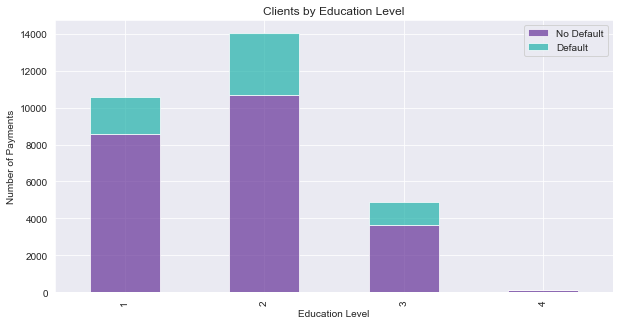

In [407]:
# Defaults by education level
print("Defaults by education level")

print("\n")
print(df.groupby(["EDUCATION", "default_payment_next_month"]).EDUCATION.count().unstack())

#Client education visualization, where 1 = graduate school; 2 = university; 3 = high school; 4 = others.
education = df.groupby(["EDUCATION", "default_payment_next_month"]).EDUCATION.count().unstack()
pl2 = education.plot(kind = "bar", stacked = True,
                    title = "Clients by Education Level", 
                    color = ["rebeccapurple", "lightseagreen"], alpha = .70)
pl2.set_xlabel("Education Level")
pl2.set_ylabel("Number of Payments")
pl2.legend(["No Default", "Default"])
plt.show()

Defaults by civil status


default_payment_next_month      0     1
MARRIAGE                               
1                           10285  3192
2                           12477  3329
3                             234    84


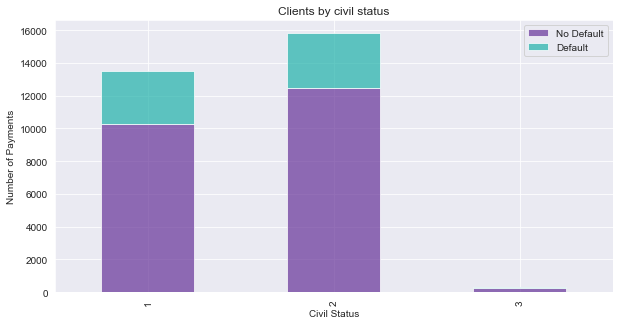

In [408]:
# Defaults by civil status
print("Defaults by civil status")

print("\n")
print(df.groupby(["MARRIAGE", "default_payment_next_month"]).MARRIAGE.count().unstack())

#Client education visualization, where 1 = married; 2 = single; 3 = others.
education = df.groupby(["MARRIAGE", "default_payment_next_month"]).MARRIAGE.count().unstack()
pl2 = education.plot(kind = "bar", stacked = True,
                    title = "Clients by civil status", 
                    color = ["rebeccapurple", "lightseagreen"], alpha = .70)
pl2.set_xlabel("Civil Status")
pl2.set_ylabel("Number of Payments")
pl2.legend(["No Default", "Default"])
plt.show()

Defaults by Age


default_payment_next_month       0      1
AGE                                      
21                            50.0   14.0
22                           386.0  167.0
23                           671.0  246.0
24                           817.0  300.0
25                           875.0  301.0
26                           993.0  252.0
27                          1143.0  312.0
28                          1112.0  285.0
29                          1280.0  313.0
30                          1108.0  274.0
31                           977.0  228.0
32                           919.0  224.0
33                           913.0  214.0
34                           916.0  231.0
35                           872.0  226.0
36                           840.0  254.0
37                           796.0  227.0
38                           742.0  194.0
39                           742.0  199.0
40                           665.0  185.0
41                           629.0  182.0
42              

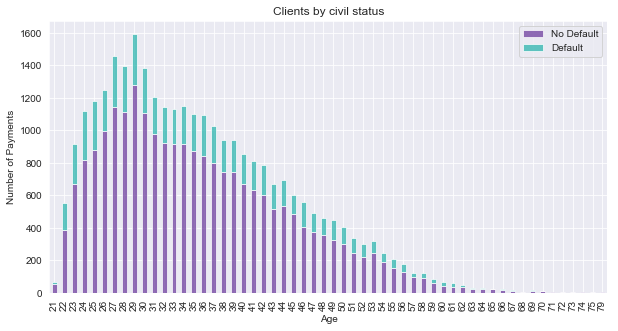

In [409]:
# Defaults by civil status
print("Defaults by Age")

print("\n")
print(df.groupby(["AGE", "default_payment_next_month"]).AGE.count().unstack())

#Client education visualization, where 1 = married; 2 = single; 3 = others.
education = df.groupby(["AGE", "default_payment_next_month"]).AGE.count().unstack()
pl2 = education.plot(kind = "bar", stacked = True,
                    title = "Clients by civil status", 
                    color = ["rebeccapurple", "lightseagreen"], alpha = .70)
pl2.set_xlabel("Age")
pl2.set_ylabel("Number of Payments")
pl2.legend(["No Default", "Default"])
plt.show()

In [410]:
df.head()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,20000,Female,2,1,24,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,Female,2,2,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,Female,2,2,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,Female,2,1,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,Male,2,1,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


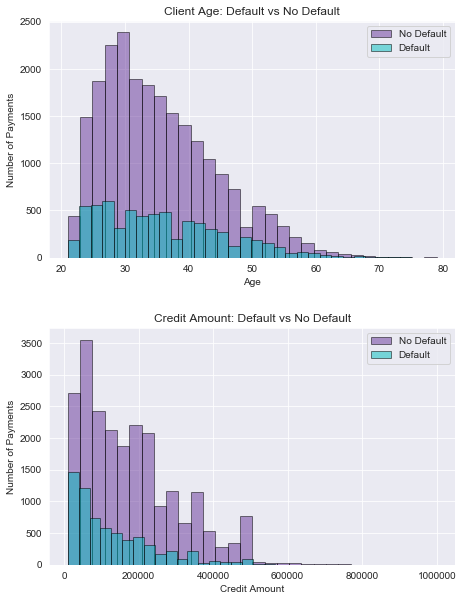

In [411]:
# Subplots of Numeric Features
sns.set_style('darkgrid')
fig = plt.figure(figsize = (16,10))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(221)
ax1.hist(df[df["default_payment_next_month"] == 0].AGE, bins = 30, label = "No Default", alpha = .50,edgecolor= "black", color = "rebeccapurple")
ax1.hist(df[df["default_payment_next_month"] == 1].AGE, bins = 30, label = "Default", alpha = .50, edgecolor = "black", color = "c")
ax1.set_title("Client Age: Default vs No Default")
ax1.set_xlabel("Age")
ax1.set_ylabel("Number of Payments")
ax1.legend(loc = "upper right")

ax2 = fig.add_subplot(223)
ax2.hist(df[df["default_payment_next_month"] == 0].LIMIT_BAL, bins = 30, label = "No Default", alpha = .50, edgecolor = "black", color = "rebeccapurple")
ax2.hist(df[df["default_payment_next_month"]==1].LIMIT_BAL, bins = 25, label = "Default", alpha = .50, edgecolor = "black", color = "c")
ax2.set_title("Credit Amount: Default vs No Default")
ax2.set_xlabel("Credit Amount")
ax2.set_ylabel("Number of Payments")
ax2.legend(loc = "upper right")


plt.show()

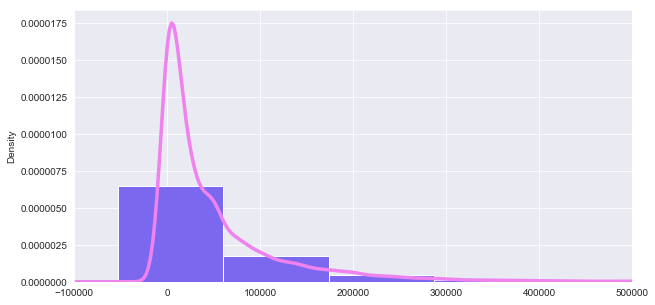

In [412]:
# Plot a histogram with a density plot for each variable in df
df["BILL_AMT1"].plot.hist(normed = True, color = "mediumslateblue")
df["BILL_AMT1"].plot.kde(linewidth = 3.5, color = "violet")
plt.xlim(-100000, 500000)
plt.show()

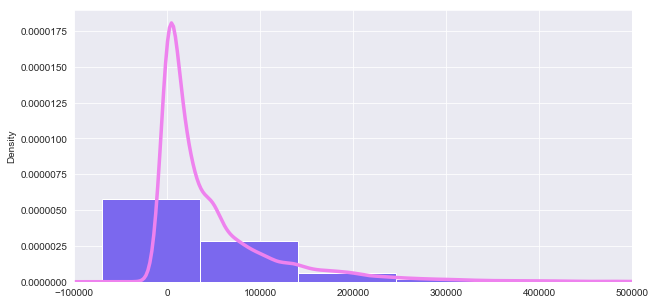

In [413]:
# Plot a histogram with a density plot for each variable in df
df["BILL_AMT2"].plot.hist(normed = True, color = "mediumslateblue")
df["BILL_AMT2"].plot.kde(linewidth = 3.5, color = "violet")
plt.xlim(-100000, 500000)
plt.show()

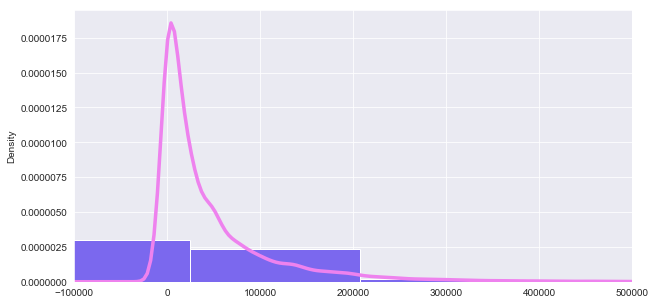

In [414]:
# Plot a histogram with a density plot for each variable in df
df["BILL_AMT3"].plot.hist(normed = True, color = "mediumslateblue")
df["BILL_AMT3"].plot.kde(linewidth = 3.5, color = "violet")
plt.xlim(-100000, 500000)
plt.show()

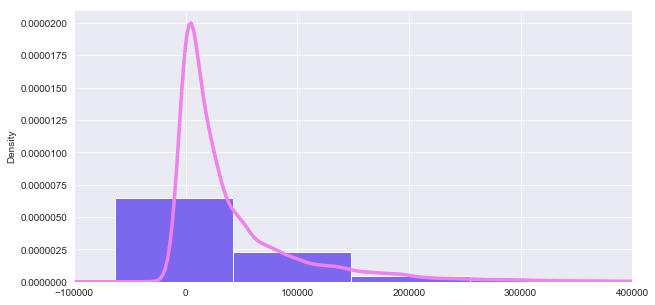

In [415]:
# Plot a histogram with a density plot for each variable in df
df["BILL_AMT4"].plot.hist(normed = True, color = "mediumslateblue")
df["BILL_AMT4"].plot.kde(linewidth = 3.5, color = "violet")
plt.xlim(-100000, 400000)
plt.show()

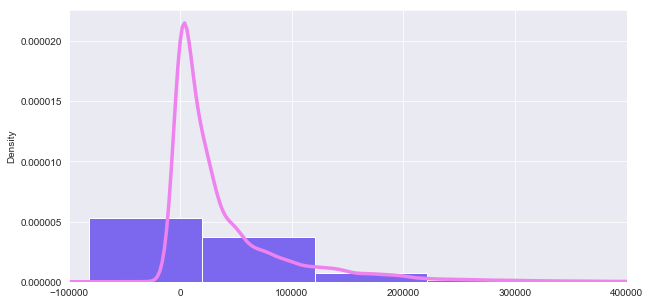

In [416]:
# Plot a histogram with a density plot for each variable in df
df["BILL_AMT5"].plot.hist(normed = True, color = "mediumslateblue")
df["BILL_AMT5"].plot.kde(linewidth = 3.5, color = "violet")
plt.xlim(-100000, 400000)
plt.show()

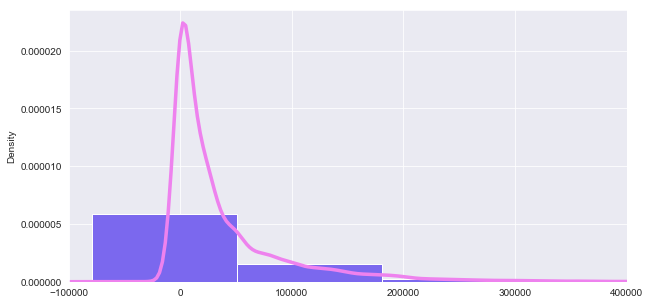

In [417]:
# Plot a histogram with a density plot for each variable in df
df["BILL_AMT6"].plot.hist(normed = True, color = "mediumslateblue")
df["BILL_AMT6"].plot.kde(linewidth = 3.5, color = "violet")
plt.xlim(-100000, 400000)
plt.show()

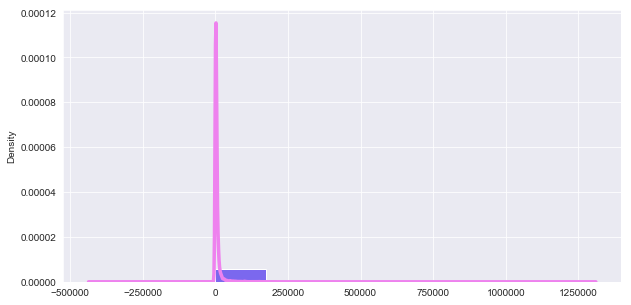

In [418]:
# Plot a histogram with a density plot for each variable in df
df["PAY_AMT1"].plot.hist(normed = True, color = "mediumslateblue", bins = 5)
df["PAY_AMT1"].plot.kde(linewidth = 3.5, color = "violet")
plt.show()

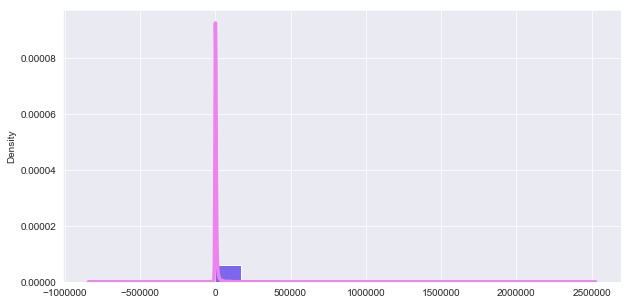

In [419]:
# Plot a histogram with a density plot for each variable in df
df["PAY_AMT2"].plot.hist(normed = True, color = "mediumslateblue")
df["PAY_AMT2"].plot.kde(linewidth = 3.5, color = "violet")
plt.show()

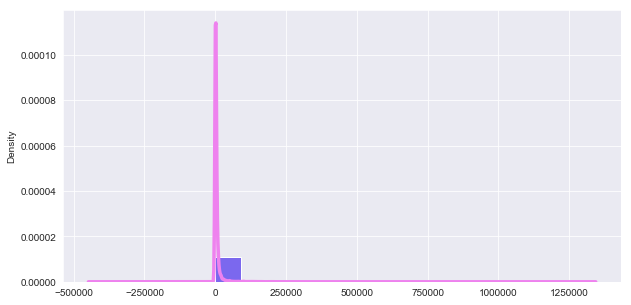

In [420]:
# Plot a histogram with a density plot for each variable in df
df["PAY_AMT3"].plot.hist(normed = True, color = "mediumslateblue")
df["PAY_AMT3"].plot.kde(linewidth = 3.5, color = "violet")
plt.show()

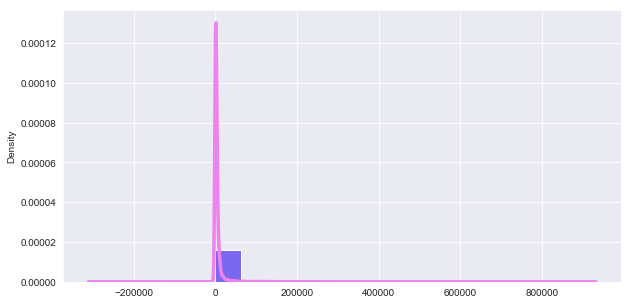

In [421]:
# Plot a histogram with a density plot for each variable in df
df["PAY_AMT4"].plot.hist(normed = True, color = "mediumslateblue")
df["PAY_AMT4"].plot.kde(linewidth = 3.5, color = "violet")
plt.show()

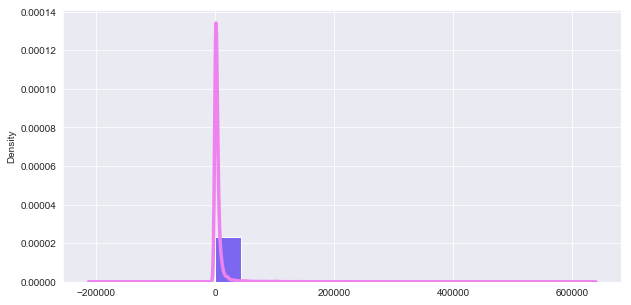

In [422]:
# Plot a histogram with a density plot for each variable in df
df["PAY_AMT5"].plot.hist(normed = True, color = "mediumslateblue")
df["PAY_AMT5"].plot.kde(linewidth = 3.5, color = "violet")
plt.show()

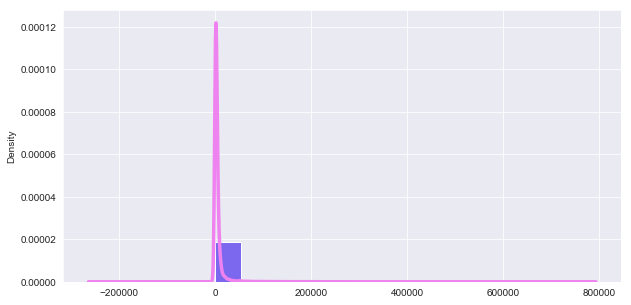

In [423]:
# Plot a histogram with a density plot for each variable in df
df["PAY_AMT6"].plot.hist(normed = True, color = "mediumslateblue")
df["PAY_AMT6"].plot.kde(linewidth = 3.5, color = "violet")
plt.show()

# Features and Target

In [424]:
# Create dummy variables
gender_dm = pd.get_dummies(df.SEX, prefix = "GENDER")
education_dm = pd.get_dummies(df.EDUCATION, prefix = "EDUCATION")
marriage_dm = pd.get_dummies(df.MARRIAGE, prefix = "MARRIAGE")
df = pd.concat([df, gender_dm, education_dm, marriage_dm], axis = 1)
df = df.drop(["SEX", "EDUCATION", "MARRIAGE"], axis = 1)

In [425]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29601 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     29601 non-null int64
AGE                           29601 non-null int64
BILL_AMT1                     29601 non-null int64
BILL_AMT2                     29601 non-null int64
BILL_AMT3                     29601 non-null int64
BILL_AMT4                     29601 non-null int64
BILL_AMT5                     29601 non-null int64
BILL_AMT6                     29601 non-null int64
PAY_AMT1                      29601 non-null int64
PAY_AMT2                      29601 non-null int64
PAY_AMT3                      29601 non-null int64
PAY_AMT4                      29601 non-null int64
PAY_AMT5                      29601 non-null int64
PAY_AMT6                      29601 non-null int64
default_payment_next_month    29601 non-null int64
GENDER_Female                 29601 non-null uint8
GENDER_Male                   29601 non-null uint8
EDUCATION_1             

In [426]:
# Outlier management - cutoff point
df = df[df.LIMIT_BAL < 750000]
df = df[df.AGE < 71]
# Define Target and Features
target = df.default_payment_next_month
features = df[["LIMIT_BAL", "GENDER_Female", "GENDER_Male", "EDUCATION_1", "EDUCATION_2", "EDUCATION_3", "EDUCATION_4", 
               "MARRIAGE_1", "MARRIAGE_2", "MARRIAGE_3", "AGE", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3",
              "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4",  "PAY_AMT5", "PAY_AMT6"]]

In [427]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29576 entries, 0 to 29999
Data columns (total 23 columns):
LIMIT_BAL        29576 non-null int64
GENDER_Female    29576 non-null uint8
GENDER_Male      29576 non-null uint8
EDUCATION_1      29576 non-null uint8
EDUCATION_2      29576 non-null uint8
EDUCATION_3      29576 non-null uint8
EDUCATION_4      29576 non-null uint8
MARRIAGE_1       29576 non-null uint8
MARRIAGE_2       29576 non-null uint8
MARRIAGE_3       29576 non-null uint8
AGE              29576 non-null int64
BILL_AMT1        29576 non-null int64
BILL_AMT2        29576 non-null int64
BILL_AMT3        29576 non-null int64
BILL_AMT4        29576 non-null int64
BILL_AMT5        29576 non-null int64
BILL_AMT6        29576 non-null int64
PAY_AMT1         29576 non-null int64
PAY_AMT2         29576 non-null int64
PAY_AMT3         29576 non-null int64
PAY_AMT4         29576 non-null int64
PAY_AMT5         29576 non-null int64
PAY_AMT6         29576 non-null int64
dtypes: int64(14)

# Feature Engineering

In [429]:
# Creating Polynomial Features, looking at the pairplot it didn't look like squaring features was worth it
poly = PolynomialFeatures(degree = 2, include_bias = False, interaction_only = True)
poly.fit(features)
column_names = poly.get_feature_names(features.columns)
poly_features = pd.DataFrame(poly.transform(features), columns = column_names)

In [430]:
# Payed or not
poly_features["PAY_1"] = np.where(poly_features.PAY_AMT1 > 0, 1, 0)
poly_features["PAY_2"] = np.where(poly_features.PAY_AMT2 > 0, 1, 0)
poly_features["PAY_3"] = np.where(poly_features.PAY_AMT3 > 0, 1, 0)
poly_features["PAY_4"] = np.where(poly_features.PAY_AMT4 > 0, 1, 0)
poly_features["PAY_5"] = np.where(poly_features.PAY_AMT5 > 0, 1, 0)
poly_features["PAY_6"] = np.where(poly_features.PAY_AMT6 > 0, 1, 0)

In [437]:
# Payment ratio month to month
poly_features["PAY_RATIO_1"] = np.where(poly_features.BILL_AMT1 != 0, round((poly_features["PAY_AMT1"] / poly_features["BILL_AMT1"]), 2), 0)
poly_features["PAY_RATIO_2"] = np.where(poly_features.BILL_AMT2 != 0, round((poly_features["PAY_AMT2"] / poly_features["BILL_AMT2"]), 2), 0)
poly_features["PAY_RATIO_3"] = np.where(poly_features.BILL_AMT3 != 0, round((poly_features["PAY_AMT3"] / poly_features["BILL_AMT3"]), 2), 0)
poly_features["PAY_RATIO_4"] = np.where(poly_features.BILL_AMT4 != 0, round((poly_features["PAY_AMT4"] / poly_features["BILL_AMT4"]), 2), 0)
poly_features["PAY_RATIO_5"] = np.where(poly_features.BILL_AMT5 != 0, round((poly_features["PAY_AMT5"] / poly_features["BILL_AMT5"]), 2), 0)
poly_features["PAY_RATIO_6"] = np.where(poly_features.BILL_AMT6 != 0, round((poly_features["PAY_AMT6"] / poly_features["BILL_AMT6"]), 2), 0)

In [438]:
# Checking for null values
poly_features.isnull().sum().sum()

0

In [440]:
# Solving for class imbalance problems
X_resample, y_resample = SMOTE().fit_sample(poly_features, target)

# Feature Transformation, Train/Test Split

In [441]:
# Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, random_state = 40, test_size = 0.2)

In [442]:
# Use MinMax Scaler to scale X
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit MinMax Scaler
scaler.fit(X_train)

# Create Scaled X
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  


In [444]:
# Sanity check
x_check = pd.DataFrame(X_train, columns = poly_features.columns)

In [445]:
# Sanity check
x_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36761 entries, 0 to 36760
Columns: 288 entries, LIMIT_BAL to PAY_RATIO_6
dtypes: float64(288)
memory usage: 80.8 MB


# Fit Model 1: Logistic Regression